<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/10/10_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Density based clustering Part1

151. Chapter agenda
152. Density based clustering - introduction
153. DBSCAN clustering algorithm
154. Nearest neighbors basics
155. Nearest neighbors in sklearn
156. Demo: implementing DBSCAN from scratch
157. DBSCAN in sklearn
158. Tuning DBSCAN parameters
159. Demo: Tuning DBSCAN parameters

#### Density based clustering

density based clustering
- cluster 內的 point 有較高的 density
- noise point 的 density 比任何 cluster 都低

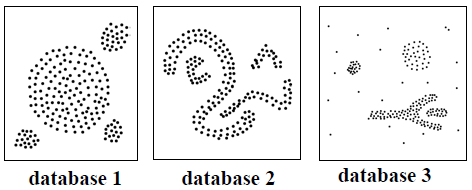

[圖源](https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf)

vs. distance based clustering
- distance based: 相似性根據 point 間的距離
- density based: 相似性根據局部連接性 (高 density)

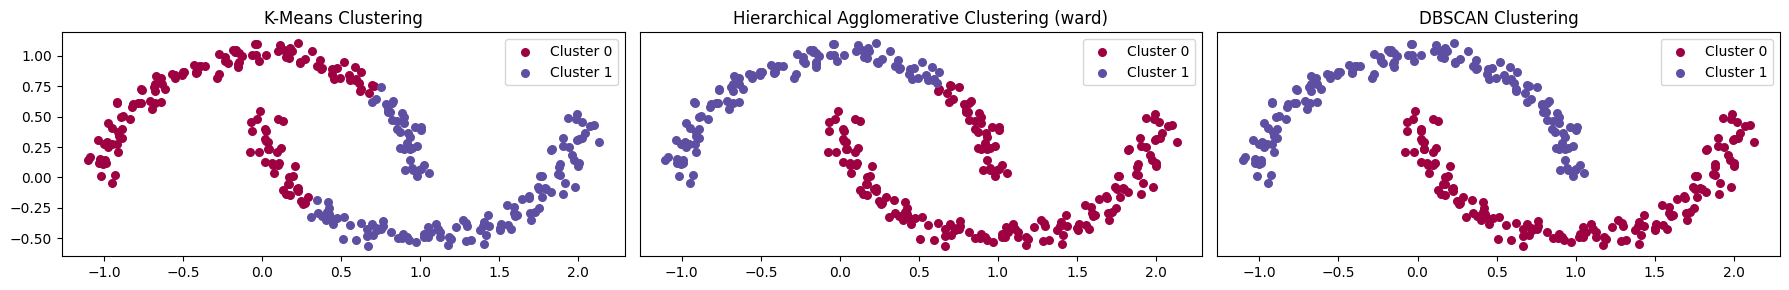

In [7]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons

# Generate synthetic data (you can replace this with your own data)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Hierarchical Agglomerative Clustering (HAC)
hac = AgglomerativeClustering(n_clusters=2)
hac_labels = hac.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results for DBSCAN
plt.figure(figsize=(18, 3))

# Plot the results for K-Means
plt.subplot(131)
unique_labels_kmeans = np.unique(kmeans_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_kmeans)))

for label, color in zip(unique_labels_kmeans, colors):
    plt.scatter(X[kmeans_labels == label][:, 0], X[kmeans_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('K-Means Clustering')
plt.legend()

# Plot the results for HAC
plt.subplot(132)
unique_labels_hac = np.unique(hac_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_hac)))

for label, color in zip(unique_labels_hac, colors):
    plt.scatter(X[hac_labels == label][:, 0], X[hac_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('Hierarchical Agglomerative Clustering (ward)')
plt.gca().set_yticks([]) # Hide y-ticks for this subplot
plt.legend()

# Plot the results for DBSCAN
plt.subplot(133)
unique_labels_dbscan = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

for label, color in zip(unique_labels_dbscan, colors):
    if label == -1:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color='gray', s=10, label='Noise')
    else:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.gca().set_yticks([]) # Hide y-ticks for this subplot
plt.legend()

# Adjust space between plots
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce gap between plots

plt.tight_layout()
plt.show()

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/0*o_BoNtBbwvAiNFLB.gif' />

[圖源](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)